In [33]:
 # In this file, we splited the data randomly using 80/20 rule as training and testing dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv("Data/ML_GRF_stance_N.csv")
df

,3.591,2.3098,1.3042,1.5446,0.99642,-0.86461,-1.8383,-3.3452,-5.4749,-8.6983,...,2.4066,2.3101,2.4457,2.7795,2.5412,2.606,2.2587,2.8207,3.6663,2.977
0,2.199,0.30152,-0.49052,-0.002909,0.89121,0.30170,-2.7868,-6.95390,-9.0650,-8.6581,...,-2.6806,-1.52520,-0.81006,-1.4067,-0.30921,1.4658,1.6661,2.5326,2.9095,3.889
1,4.317,1.07650,-0.75328,0.764090,-0.55040,-3.91910,-7.3576,-10.71500,-12.6630,-11.4040,...,19.6700,17.28500,13.19600,10.5000,8.78740,7.5012,7.3930,6.2177,5.0284,4.098
2,3.310,0.52531,1.30960,0.409730,-2.29800,-5.33850,-9.7976,-12.07200,-12.3320,-10.2080,...,7.8613,7.05710,6.05990,4.8255,4.89040,5.4780,5.8122,6.0775,3.7969,4.605
3,1.821,-1.24800,-5.39700,-6.074400,-5.49380,-8.26350,-9.4401,-9.57430,-9.1991,-5.4045,...,17.5130,16.00400,13.37500,12.1960,9.85130,10.2140,8.3698,7.0593,6.6789,5.439
4,2.466,1.43950,-1.35490,-4.770000,-4.33850,-4.46170,-4.4079,-4.11200,-4.2620,-2.7785,...,7.6825,6.49750,6.85050,5.8744,5.64470,5.3250,4.9485,4.5697,3.6020,3.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15690,-0.434,4.50740,5.93060,-2.600900,-14.79000,-21.28800,-24.8200,-21.49100,-24.4130,-20.9730,...,1.5590,-0.46055,0.12782,3.0011,5.22610,6.6191,7.3697,6.1280,4.3417,2.069
15691,1.164,4.43190,6.86710,-1.672000,-13.79200,-16.55900,-19.6420,-15.64400,-15.9730,-11.9680,...,16.6990,15.46100,14.13000,12.3930,9.90540,11.1470,10.2610,9.6713,7.0213,4.497
15692,4.382,6.59760,10.75200,9.721600,8.98050,1.87340,-6.8512,-11.07200,-13.6950,-13.3810,...,7.4279,4.48850,4.43140,6.7222,9.92060,8.3431,9.4538,8.9652,8.4592,4.879
15693,2.034,4.12090,9.56290,10.201000,4.41000,0.35724,-2.6013,-0.57981,-2.3533,-2.0854,...,12.7620,11.09300,9.80270,10.3710,11.67700,10.8000,10.5260,10.5630,8.7945,5.286


In [40]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.random import seed
seed(42)
from tensorflow import random
random.set_seed(42)

In [70]:
encoding_dim = 30
input_data = Input(shape=(100,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_data)
encoded_2 = Dense(200, activation='relu')(encoded)
encoded_3 = Dense(300, activation='relu')(encoded_2)
encoded_4 = Dense(encoding_dim, activation='relu')(encoded_3)
decoded_2 = Dense(200, activation='relu')(encoded_4)
decoded_1 = Dense(300, activation='relu')(decoded_2)
x2 = Dense(300, activation='relu')(decoded_1)
# decoded representation of code 
decoded = Dense(100)(x2)
# Model which take input image and shows decoded images
autoencoder = Model(input_data, decoded)

In [71]:
autoencoder.compile(optimizer='adam', loss='mse')

In [72]:
data = np.array(df)
data.shape

(15695, 100)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=2022)

In [74]:
print(X_train.shape)
print(X_test.shape)

(12556, 100)
(3139, 100)


In [75]:
n_epochs = 800

In [76]:
history = autoencoder.fit(X_train, X_train,
                epochs=n_epochs,
                batch_size=256,
                validation_data=(X_test, X_test),
                         verbose = False)

2022-05-05 22:22:34.068142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-05 22:22:34.686956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


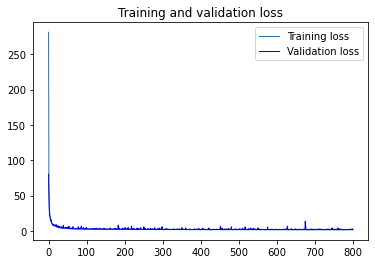

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss', lw=1)
plt.plot(epochs, val_loss, 'b', label='Validation loss', lw=1)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [78]:
decoded_data = autoencoder(X_test)

In [79]:
decoded_data.shape

TensorShape([3139, 100])

## Example 1:

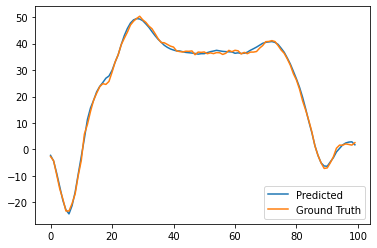

In [80]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[0], label="Predicted")
plt.plot(xx, X_test[0], label="Ground Truth")
plt.legend()
plt.show()

## Example 2:

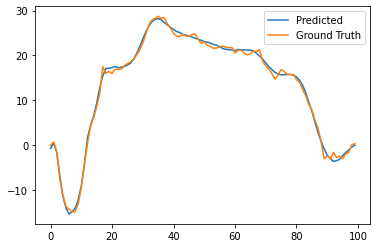

In [81]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[1], label="Predicted")
plt.plot(xx, X_test[1], label="Ground Truth")
plt.legend()
plt.show()

## Example 3:

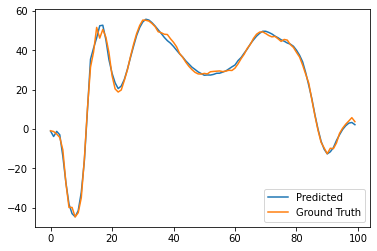

In [82]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[2], label="Predicted")
plt.plot(xx, X_test[2], label="Ground Truth")
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#mean_squared_error(X_test, decoded_data)

r2 = r2_score(X_test, decoded_data)
rmse = sqrt(mean_squared_error(X_test, decoded_data))

# RMSE normalised by mean:
nrmse = rmse/sqrt(np.mean(X_test**2))


#reference: https://stats.stackexchange.com/questions/194278/meaning-of-reconstruction-error-in-pca-and-lda

0.039040845854724705

Assume X_test is your original data and decoded_data is the compressed data
What I usually use as the measure of reconstruction error (in the context of PCA, but also other methods) is the coefficient of determination 𝑅2 and the Root Mean Squared Error (or normalised RMSE). These two are easy to compute and give you a quick idea of what the reconstruction did.

Since 𝑅2 = 1.0 for a perfect fit, you can judge the reconstruction by how close the 𝑅2 is to 1.0. In our case, our R2 = 0.97

In [84]:
r2

0.9737635397550299

In [85]:
rmse

1.3718608947024753

In [86]:
nrmse

0.039040845854724705